In [5]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
labels_data = pd.read_excel('Price 2019-25.xlsx')
conference_data = pd.read_csv('DEFINITIVE_CONFERENCE_DATA.csv', index_col=0)

conference_data['label_start_date'] = pd.to_datetime(conference_data['label_start_date'])
conference_data['label_end_date'] = pd.to_datetime(conference_data['label_end_date'])
labels_data['Date'] = pd.to_datetime(labels_data['Date'])

In [7]:
labels_data.to_csv('Price_2019_25.csv')

## EDA

In [8]:
labels_data

,Date,Ticker,Entreprise,Close
0,2018-12-31,AAPL,Apple Inc.,37.624241
1,2018-12-31,ABBV,AbbVie Inc.,69.758171
2,2018-12-31,ABT,Abbott Laboratories,64.868744
3,2018-12-31,ACN,Accenture plc,129.389038
4,2018-12-31,ADBE,Adobe Inc.,226.240005
...,...,...,...,...
336720,2025-03-28,WMT,Walmart Inc.,85.150002
336721,2025-03-28,WY,Weyerhaeuser Company,29.360001
336722,2025-03-28,XEL,Xcel Energy Inc.,69.720001
336723,2025-03-28,XOM,Exxon Mobil Corporation,117.730003


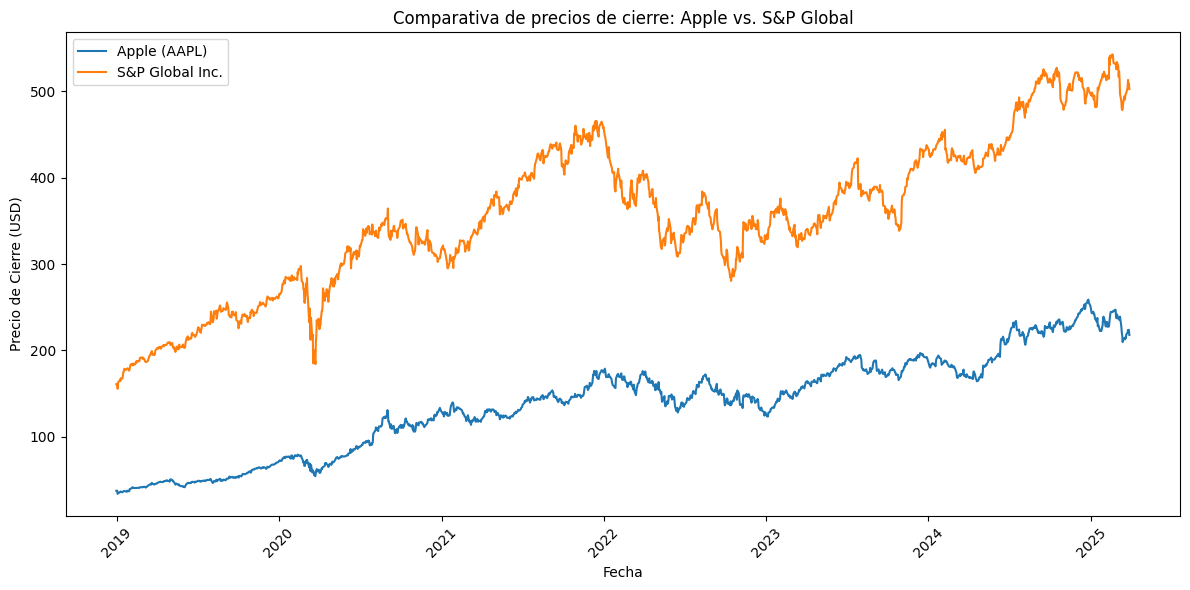

In [9]:
df = labels_data.sort_values('Date')

# Filtrar solo AAPL si hay más empresas (opcional)
df_aapl = df[df['Ticker'] == 'AAPL']
df_sp = df[df['Entreprise'] == 'S&P Global Inc.']

plt.figure(figsize=(12, 6))

# Apple
sns.lineplot(data=df_aapl, x='Date', y='Close', label='Apple (AAPL)')

# S&P Global
sns.lineplot(data=df_sp, x='Date', y='Close', label='S&P Global Inc.')

plt.title('Comparativa de precios de cierre: Apple vs. S&P Global')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre (USD)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

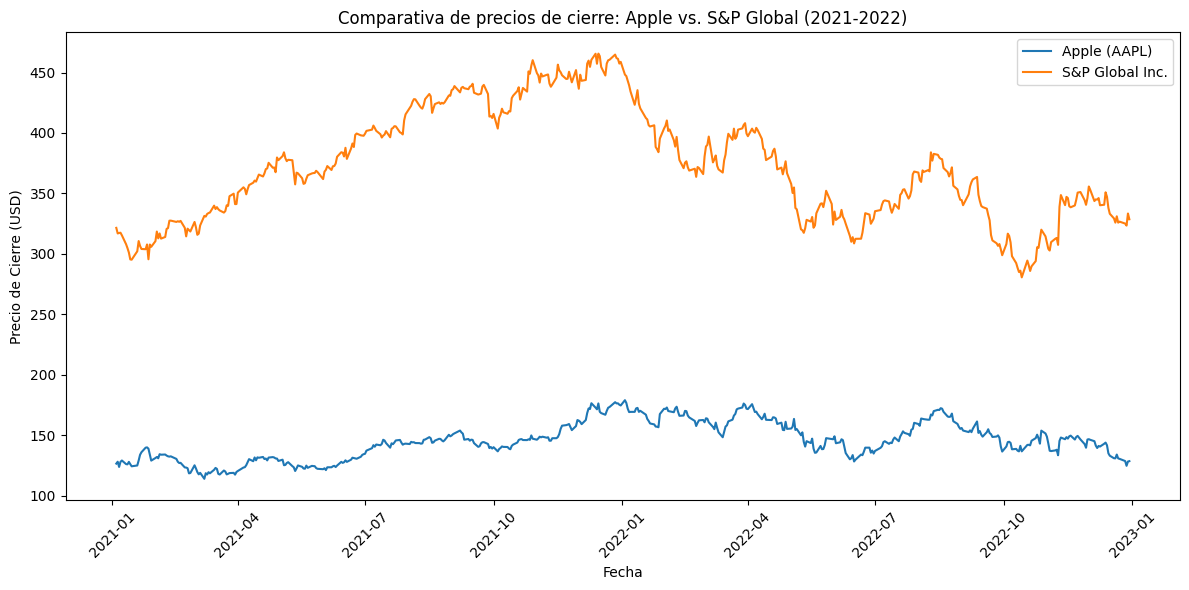

In [10]:

# Filtrar por rango de fechas
start_date = '2021-01-01'
end_date = '2023-01-01'
df_filtered = df[(df['Date'] >= start_date) & (df['Date'] < end_date)]

# Filtrar Apple y S&P Global Inc.
df_aapl = df_filtered[df_filtered['Ticker'] == 'AAPL']
df_sp = df_filtered[df_filtered['Entreprise'] == 'S&P Global Inc.']

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_aapl, x='Date', y='Close', label='Apple (AAPL)')
sns.lineplot(data=df_sp, x='Date', y='Close', label='S&P Global Inc.')

plt.title('Comparativa de precios de cierre: Apple vs. S&P Global (2021-2022)')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre (USD)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Labels dataframe generation

In [11]:
tickers_df = set(df['Ticker'].unique())
symbols_conference = set(conference_data['symbol'].unique())

# Comunes
common_symbols = tickers_df & symbols_conference

# En df pero no en conference_data
only_in_prices = tickers_df - symbols_conference

# En conference_data pero no en df
only_in_conferences = symbols_conference - tickers_df

print("Símbolos solo en datos de precios:", sorted(only_in_prices))
print("Símbolos solo en datos de conferencias:", sorted(only_in_conferences))

Símbolos solo en datos de precios: ['PG', '^SPX']
Símbolos solo en datos de conferencias: []


In [12]:
# Obtener símbolos presentes en ambos datasets
tickers = set(labels_data['Ticker'].unique())
symbols = set(conference_data['symbol'].unique())

common_symbols = sorted(tickers & symbols - {'PG', '^SPX'})
df_spx = labels_data[labels_data['Ticker'] == '^SPX'].copy()

# Lista para almacenar resultados de todas las empresas
all_intervals = []

# Iterar sobre cada símbolo común
for symbol in common_symbols:
    df_company = labels_data[labels_data['Ticker'] == symbol]
    company_conferences = conference_data[conference_data['symbol'] == symbol]
    
    for _, row in company_conferences.iterrows():
        start_date = row['label_start_date']
        end_date = row['label_end_date']
        
        df_interval = df_company[(df_company['Date'] >= start_date) & (df_company['Date'] <= end_date)].copy()
        
        if not df_interval.empty:
            df_interval['conference_id'] = row['conference_id']
            df_interval['path'] = row['path']
            df_interval['year'] = row['year']
            df_interval['quarter'] = row['quarter']
            df_interval['conference_timestamp'] = row['timestamp']
            df_interval['label_start_date'] = row['label_start_date']
            df_interval['label_end_date'] = row['label_end_date']
            df_interval['day'] = row['day']
            df_interval['month'] = row['month']
            
            all_intervals.append(df_interval)

# Añadir columnas de conferencia con None
df_spx['conference_id'] = None
df_spx['path'] = None
df_spx['year'] = None
df_spx['quarter'] = None
df_spx['conference_timestamp'] = None
df_spx['label_start_date'] = None
df_spx['label_end_date'] = None
df_spx['day'] = None
df_spx['month'] = None

# Concatenar todo en un solo DataFrame
df_with_conferences = pd.concat(all_intervals, ignore_index=True)

# Concatenar con el DataFrame final
df_with_conferences = pd.concat([df_with_conferences, df_spx], ignore_index=True)
def_df = df_with_conferences
# def_df.to_csv('LABELS.csv')

/tmp/ipykernel_160799/2227342452.py:50: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_with_conferences = pd.concat([df_with_conferences, df_spx], ignore_index=True)


In [13]:
def_df

,Date,Ticker,Entreprise,Close,conference_id,path,year,quarter,conference_timestamp,label_start_date,label_end_date,day,month
0,2019-10-23,AAPL,Apple Inc.,58.698727,13,/home/aacastro/mchai/companies/AAPL/2019/Q4,2019,Q4,2019-10-30,2019-10-23,2019-11-06,30,10
1,2019-10-24,AAPL,Apple Inc.,58.795277,13,/home/aacastro/mchai/companies/AAPL/2019/Q4,2019,Q4,2019-10-30,2019-10-23,2019-11-06,30,10
2,2019-10-25,AAPL,Apple Inc.,59.519424,13,/home/aacastro/mchai/companies/AAPL/2019/Q4,2019,Q4,2019-10-30,2019-10-23,2019-11-06,30,10
3,2019-10-28,AAPL,Apple Inc.,60.115623,13,/home/aacastro/mchai/companies/AAPL/2019/Q4,2019,Q4,2019-10-30,2019-10-23,2019-11-06,30,10
4,2019-10-29,AAPL,Apple Inc.,58.725269,13,/home/aacastro/mchai/companies/AAPL/2019/Q4,2019,Q4,2019-10-30,2019-10-23,2019-11-06,30,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41549,2025-03-24,^SPX,S&P 500 INDEX,5767.569824,None,None,None,None,None,NaT,NaT,None,None
41550,2025-03-25,^SPX,S&P 500 INDEX,5776.649902,None,None,None,None,None,NaT,NaT,None,None
41551,2025-03-26,^SPX,S&P 500 INDEX,5712.200195,None,None,None,None,None,NaT,NaT,None,None
41552,2025-03-27,^SPX,S&P 500 INDEX,5693.310059,None,None,None,None,None,NaT,NaT,None,None


In [14]:
df_ap = def_df[def_df['conference_id'] == 24]
df_ap

,Date,Ticker,Entreprise,Close,conference_id,path,year,quarter,conference_timestamp,label_start_date,label_end_date,day,month
121,2021-01-20,AAPL,Apple Inc.,128.964432,24,/home/aacastro/mchai/companies/AAPL/2021/Q1,2021,Q1,2021-01-27,2021-01-20,2021-02-03,27,1
122,2021-01-21,AAPL,Apple Inc.,133.692017,24,/home/aacastro/mchai/companies/AAPL/2021/Q1,2021,Q1,2021-01-27,2021-01-20,2021-02-03,27,1
123,2021-01-22,AAPL,Apple Inc.,135.840942,24,/home/aacastro/mchai/companies/AAPL/2021/Q1,2021,Q1,2021-01-27,2021-01-20,2021-02-03,27,1
124,2021-01-25,AAPL,Apple Inc.,139.601547,24,/home/aacastro/mchai/companies/AAPL/2021/Q1,2021,Q1,2021-01-27,2021-01-20,2021-02-03,27,1
125,2021-01-26,AAPL,Apple Inc.,139.835953,24,/home/aacastro/mchai/companies/AAPL/2021/Q1,2021,Q1,2021-01-27,2021-01-20,2021-02-03,27,1
126,2021-01-27,AAPL,Apple Inc.,138.761490,24,/home/aacastro/mchai/companies/AAPL/2021/Q1,2021,Q1,2021-01-27,2021-01-20,2021-02-03,27,1
127,2021-01-28,AAPL,Apple Inc.,133.906891,24,/home/aacastro/mchai/companies/AAPL/2021/Q1,2021,Q1,2021-01-27,2021-01-20,2021-02-03,27,1
128,2021-01-29,AAPL,Apple Inc.,128.896057,24,/home/aacastro/mchai/companies/AAPL/2021/Q1,2021,Q1,2021-01-27,2021-01-20,2021-02-03,27,1
129,2021-02-01,AAPL,Apple Inc.,131.025421,24,/home/aacastro/mchai/companies/AAPL/2021/Q1,2021,Q1,2021-01-27,2021-01-20,2021-02-03,27,1
130,2021-02-02,AAPL,Apple Inc.,131.855667,24,/home/aacastro/mchai/companies/AAPL/2021/Q1,2021,Q1,2021-01-27,2021-01-20,2021-02-03,27,1


## Ploting generated dataset

In [13]:
# def plot_prices_with_conferences(df_empresa, ticker, marcador='punto'):
#     """
#     Dibuja la serie temporal de precios de una empresa con marcadores de conferencias.

#     Parámetros:
#     - df_empresa: DataFrame con columnas 'Date', 'Close', 'conference_timestamp', 
#                   'label_start_date', 'label_end_date'
#     - ticker: str, ticker de la empresa (para el título y etiquetas)
#     - marcador: 
#         - 'punto': coloca puntos rojos grandes en los días de conferencia.
#         - 'barra': muestra una línea vertical en el día de la conferencia y sombrea el intervalo:
#             - 🟥 Rojo claro ('lightcoral') en la mitad donde el precio medio es más bajo.
#             - 🟩 Verde claro ('lightgreen') en la mitad donde el precio medio es más alto.
#     """
#     df_empresa = df_empresa.copy()
    
#     plt.figure(figsize=(14, 6))
    
#     sns.lineplot(data=df_empresa, x='Date', y='Close', label=f'{ticker} price')

#     df_empresa['conference_timestamp'] = pd.to_datetime(df_empresa['conference_timestamp'])
#     df_empresa['label_start_date'] = pd.to_datetime(df_empresa['label_start_date'])
#     df_empresa['label_end_date'] = pd.to_datetime(df_empresa['label_end_date'])

#     if marcador == 'punto':
#         for _, row in df_empresa.drop_duplicates('conference_id').iterrows():
#             fecha = row['conference_timestamp']
#             valor = df_empresa[df_empresa['Date'] == fecha]['Close']
#             if valor.empty:
#                 closest_row = df_empresa.iloc[(df_empresa['Date'] - fecha).abs().argsort().iloc[0]]
#                 fecha = closest_row['Date']
#                 valor = closest_row['Close']
#             else:
#                 valor = valor.iloc[0]
#             plt.scatter(fecha, valor, color='red', s=100, zorder=5, label='Conference Day')

#     elif marcador == 'barra':
#         for _, row in df_empresa.drop_duplicates('conference_id').iterrows():
#             ts = row['conference_timestamp']
#             start = row['label_start_date']
#             end = row['label_end_date']

#             plt.axvline(x=ts, color='red', linestyle='--', label='Conference Day')
            
#             before_mask = (df_empresa['Date'] >= start) & (df_empresa['Date'] < ts)
#             after_mask = (df_empresa['Date'] > ts) & (df_empresa['Date'] <= end)

#             mean_before = df_empresa.loc[before_mask, 'Close'].mean()
#             mean_after = df_empresa.loc[after_mask, 'Close'].mean()

#             if pd.notna(mean_before) and pd.notna(mean_after):
#                 if mean_before > mean_after:
#                     # Baja después → rojo después, verde antes
#                     plt.axvspan(start, ts, color='lightgreen', alpha=0.25, label='Before (better)')
#                     plt.axvspan(ts, end, color='lightcoral', alpha=0.25, label='After (worse)')
#                 elif mean_after > mean_before:
#                     # Sube después → rojo antes, verde después
#                     plt.axvspan(start, ts, color='lightcoral', alpha=0.25, label='Before (worse)')
#                     plt.axvspan(ts, end, color='lightgreen', alpha=0.25, label='After (better)')
#                 else:
#                     # Igual → neutral
#                     plt.axvspan(start, ts, color='lightgray', alpha=0.25, label='Before')
#                     plt.axvspan(ts, end, color='lightgray', alpha=0.25, label='After')
#             else:
#                 plt.axvspan(start, ts, color='lightgray', alpha=0.25, label='Before')
#                 plt.axvspan(ts, end, color='lightgray', alpha=0.25, label='After')

#     handles, labels = plt.gca().get_legend_handles_labels()
#     by_label = dict(zip(labels, handles))
#     plt.legend(by_label.values(), by_label.keys())

#     plt.title(f'Precio de cierre para {ticker} con eventos de conferencia')
#     plt.xlabel('Fecha')
#     plt.ylabel('Precio de Cierre (USD)')
#     plt.xticks(rotation=45)
#     plt.tight_layout()
#     plt.show()

In [14]:
def plot_prices_with_conferences(df_empresa, ticker, marcador='punto'):
    """
    Dibuja la serie temporal de precios de una empresa con marcadores de conferencias.

    Parámetros:
    - df_empresa: DataFrame con columnas 'Date', 'Close', 'conference_timestamp', 
                  'label_start_date', 'label_end_date'
    - ticker: str, ticker de la empresa (para el título y etiquetas)
    - marcador: 
        - 'punto': coloca puntos rojos grandes en los días de conferencia.
        - 'barra': muestra sombreado dinámico (rojo/verde) y también los puntos rojos.
    """
    df_empresa = df_empresa.copy()
    
    plt.figure(figsize=(14, 6))
    
    # Línea de evolución del precio
    sns.lineplot(data=df_empresa, x='Date', y='Close', label=f'{ticker} price')

    # Asegurar tipo datetime
    df_empresa['conference_timestamp'] = pd.to_datetime(df_empresa['conference_timestamp'])
    df_empresa['label_start_date'] = pd.to_datetime(df_empresa['label_start_date'])
    df_empresa['label_end_date'] = pd.to_datetime(df_empresa['label_end_date'])

    # Usado para controlar etiquetas duplicadas
    already_labeled = set()

    for _, row in df_empresa.drop_duplicates('conference_id').iterrows():
        ts = row['conference_timestamp']
        start = row['label_start_date']
        end = row['label_end_date']

        # Buscar valor más cercano al día de la conferencia
        valor = df_empresa[df_empresa['Date'] == ts]['Close']
        if valor.empty:
            closest_row = df_empresa.iloc[(df_empresa['Date'] - ts).abs().argsort().iloc[0]]
            ts = closest_row['Date']
            valor = closest_row['Close']
        else:
            valor = valor.iloc[0]

        # Siempre dibujar el punto rojo
        label = 'Conference Day' if 'Conference Day' not in already_labeled else None
        plt.scatter(ts, valor, color='red', s=100, zorder=5, label=label)
        already_labeled.add('Conference Day')

        if marcador == 'barra':
            before_mask = (df_empresa['Date'] >= start) & (df_empresa['Date'] < ts)
            after_mask = (df_empresa['Date'] > ts) & (df_empresa['Date'] <= end)

            mean_before = df_empresa.loc[before_mask, 'Close'].mean()
            mean_after = df_empresa.loc[after_mask, 'Close'].mean()

            if pd.notna(mean_before) and pd.notna(mean_after):
                if mean_before > mean_after:
                    label_before = 'Before (better)' if 'Before (better)' not in already_labeled else None
                    label_after = 'After (worse)' if 'After (worse)' not in already_labeled else None
                    plt.axvspan(start, ts, color='lightgreen', alpha=0.25, label=label_before)
                    plt.axvspan(ts, end, color='lightcoral', alpha=0.25, label=label_after)
                    already_labeled.update(['Before (better)', 'After (worse)'])
                elif mean_after > mean_before:
                    label_before = 'Before (worse)' if 'Before (worse)' not in already_labeled else None
                    label_after = 'After (better)' if 'After (better)' not in already_labeled else None
                    plt.axvspan(start, ts, color='lightcoral', alpha=0.25, label=label_before)
                    plt.axvspan(ts, end, color='lightgreen', alpha=0.25, label=label_after)
                    already_labeled.update(['Before (worse)', 'After (better)'])
                else:
                    label_neutral = 'Neutral' if 'Neutral' not in already_labeled else None
                    plt.axvspan(start, end, color='lightgray', alpha=0.25, label=label_neutral)
                    already_labeled.add('Neutral')
            else:
                label_neutral = 'Neutral' if 'Neutral' not in already_labeled else None
                plt.axvspan(start, end, color='lightgray', alpha=0.25, label=label_neutral)
                already_labeled.add('Neutral')

    # Eliminar etiquetas duplicadas
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys())

    plt.title(f'Precio de cierre para {ticker} con eventos de conferencia')
    plt.xlabel('Fecha')
    plt.ylabel('Precio de Cierre (USD)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [ ]:
def plot_price_with_index_in_conference_range(df_empresa, labels_data, ticker, marcador='barra', index_name='S&P Global Inc.'):
    """
    Dibuja el precio de una empresa y del índice general en el rango de cada conferencia.
    Incluye puntos y sombreado si marcador='barra'.

    Parámetros:
    - df_empresa: DataFrame con columnas 'Date', 'Close', 'conference_timestamp',
                  'label_start_date', 'label_end_date' para una única empresa
    - labels_data: DataFrame con todas las empresas, incluyendo el índice
    - ticker: str, ticker de la empresa (para título y color)
    - marcador: 'punto' o 'barra'
    - index_name: str, nombre exacto de la empresa del índice en la columna 'Entreprise'
    """
    df_empresa = df_empresa.copy()
    df_empresa['Date'] = pd.to_datetime(df_empresa['Date'])
    df_empresa['conference_timestamp'] = pd.to_datetime(df_empresa['conference_timestamp'])
    df_empresa['label_start_date'] = pd.to_datetime(df_empresa['label_start_date'])
    df_empresa['label_end_date'] = pd.to_datetime(df_empresa['label_end_date'])

    # Coger datos del índice
    df_index = labels_data[labels_data['Entreprise'] == index_name].copy()
    df_index['Date'] = pd.to_datetime(df_index['Date'])

    for _, row in df_empresa.drop_duplicates('conference_id').iterrows():
        ts = row['conference_timestamp']
        start = row['label_start_date']
        end = row['label_end_date']

        # Datos de empresa e índice en el rango de la conferencia
        mask_range = (df_empresa['Date'] >= start) & (df_empresa['Date'] <= end)
        df_plot = df_empresa[mask_range].copy()

        df_index_plot = df_index[(df_index['Date'] >= start) & (df_index['Date'] <= end)].copy()

        if df_plot.empty or df_index_plot.empty:
            continue  # Saltar si no hay datos suficientes

        plt.figure(figsize=(14, 6))

        # Línea de precios
        sns.lineplot(data=df_plot, x='Date', y='Close', label=f'{ticker}')
        sns.lineplot(data=df_index_plot, x='Date', y='Close', label=index_name)

        # Marcas y sombreado
        valor = df_plot[df_plot['Date'] == ts]['Close']
        if valor.empty:
            closest_row = df_plot.iloc[(df_plot['Date'] - ts).abs().argsort().iloc[0]]
            ts_plot = closest_row['Date']
            valor = closest_row['Close']
        else:
            ts_plot = ts
            valor = valor.iloc[0]

        # Punto rojo
        plt.scatter(ts_plot, valor, color='red', s=100, zorder=5, label='Conference Day')

        if marcador == 'barra':
            before_mask = (df_plot['Date'] >= start) & (df_plot['Date'] < ts)
            after_mask = (df_plot['Date'] > ts) & (df_plot['Date'] <= end)

            mean_before = df_plot.loc[before_mask, 'Close'].mean()
            mean_after = df_plot.loc[after_mask, 'Close'].mean()

            if pd.notna(mean_before) and pd.notna(mean_after):
                if mean_before > mean_after:
                    plt.axvspan(start, ts, color='lightgreen', alpha=0.25, label='Before (better)')
                    plt.axvspan(ts, end, color='lightcoral', alpha=0.25, label='After (worse)')
                elif mean_after > mean_before:
                    plt.axvspan(start, ts, color='lightcoral', alpha=0.25, label='Before (worse)')
                    plt.axvspan(ts, end, color='lightgreen', alpha=0.25, label='After (better)')
                else:
                    plt.axvspan(start, end, color='lightgray', alpha=0.25, label='Neutral')
            else:
                plt.axvspan(start, end, color='lightgray', alpha=0.25, label='Neutral')

        # Ajustes del gráfico
        handles, labels_legend = plt.gca().get_legend_handles_labels()
        by_label = dict(zip(labels_legend, handles))
        plt.legend(by_label.values(), by_label.keys())

        plt.title(f'{ticker} vs. {index_name} | Conferencia {row["conference_id"]}')
        plt.xlabel('Fecha')
        plt.ylabel('Precio de Cierre (USD)')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

In [43]:
def plot_price_with_index_in_conference_range(
    df_empresa, labels_data, ticker, marcador='barra',
    index_name='S&P Global Inc.', relativo=False
):
    """
    Dibuja el precio de una empresa y del índice general en el rango de cada conferencia.
    Si relativo=True, muestra el delta relativo ΔEmpresa/ΔÍndice en lugar de precios absolutos.

    Parámetros:
    - df_empresa: DataFrame con columnas 'Date', 'Close', 'conference_timestamp',
                  'label_start_date', 'label_end_date' para una única empresa
    - labels_data: DataFrame con todas las empresas, incluyendo el índice
    - ticker: str, ticker de la empresa (para título y color)
    - marcador: 'punto' o 'barra'
    - index_name: str, nombre exacto de la empresa del índice en la columna 'Entreprise'
    - relativo: bool, si True muestra ΔEmpresa/ΔÍndice
    """
    df_empresa = df_empresa.copy()
    df_empresa['Date'] = pd.to_datetime(df_empresa['Date'])
    df_empresa['conference_timestamp'] = pd.to_datetime(df_empresa['conference_timestamp'])
    df_empresa['label_start_date'] = pd.to_datetime(df_empresa['label_start_date'])
    df_empresa['label_end_date'] = pd.to_datetime(df_empresa['label_end_date'])

    # Datos del índice
    df_index = labels_data[labels_data['Entreprise'] == index_name].copy()
    df_index['Date'] = pd.to_datetime(df_index['Date'])

    for _, row in df_empresa.drop_duplicates('conference_id').iterrows():
        ts = row['conference_timestamp']
        start = row['label_start_date']
        end = row['label_end_date']

        # Filtrar en el rango
        df_plot = df_empresa[(df_empresa['Date'] >= start) & (df_empresa['Date'] <= end)].copy()
        df_index_plot = df_index[(df_index['Date'] >= start) & (df_index['Date'] <= end)].copy()

        if df_plot.empty or df_index_plot.empty:
            continue

        # Merge para alinear por fechas
        df_merge = pd.merge(df_plot[['Date', 'Close']], df_index_plot[['Date', 'Close']],
                            on='Date', suffixes=(f'_{ticker}', '_index'))

    if relativo:
        print("\n--- Análisis relativo para conferencia", row['conference_id'], "---")
        print("Fechas disponibles:")
        print(df_merge['Date'].to_list())
        print(f"Precios {ticker}:")
        print(df_merge[[f'Close_{ticker}']])
        print("Precios índice:")
        print(df_merge[['Close_index']])

        # Cálculo de variaciones diarias (delta día a día)
        df_merge['delta_empresa'] = df_merge[f'Close_{ticker}'].diff()
        df_merge['delta_indice'] = df_merge['Close_index'].diff()
        # df_merge['delta_empresa'] = df_merge[f'Close_{ticker}'].pct_change()
        # df_merge['delta_indice'] = df_merge['Close_index'].pct_change()

        print("\nDelta diario de la empresa:")
        print(df_merge[['Date', 'delta_empresa']])
        print("\nDelta diario del índice:")
        print(df_merge[['Date', 'delta_indice']])

        # Cálculo de variación relativa
        df_merge['RelDelta'] = df_merge['delta_empresa'] / df_merge['delta_indice']

        print("\nRatio ΔEmpresa / ΔÍndice:")
        print(df_merge[['Date', 'RelDelta']])

        # Elimina NaNs y divisiones por cero
        df_merge = df_merge.dropna(subset=['RelDelta'])
        df_merge = df_merge.replace([np.inf, -np.inf], np.nan).dropna(subset=['RelDelta'])

        plt.figure(figsize=(14, 6))

        # Plotear según modo
        if relativo:
            sns.lineplot(data=df_merge, x='Date', y='RelDelta', label='ΔEmpresa / ΔÍndice')
            ylabel = 'Variación relativa ΔEmpresa/ΔÍndice'
        else:
            sns.lineplot(data=df_merge, x='Date', y=f'Close_{ticker}', label=f'{ticker}')
            sns.lineplot(data=df_merge, x='Date', y='Close_index', label=index_name)
            ylabel = 'Precio de Cierre (USD)'

        # Punto rojo
        ts_plot = ts
        valor = df_merge[df_merge['Date'] == ts_plot]
        if valor.empty:
            closest_row = df_merge.iloc[(df_merge['Date'] - ts_plot).abs().argsort().iloc[0]]
            ts_plot = closest_row['Date']
            val_y = closest_row['RelDelta'] if relativo else closest_row[f'Close_{ticker}']
        else:
            val_y = valor['RelDelta'].iloc[0] if relativo else valor[f'Close_{ticker}'].iloc[0]

        plt.scatter(ts_plot, val_y, color='red', s=100, zorder=5, label='Conference Day')

        if marcador == 'barra' and not relativo:
            before_mask = (df_merge['Date'] >= start) & (df_merge['Date'] < ts)
            after_mask = (df_merge['Date'] > ts) & (df_merge['Date'] <= end)

            mean_before = df_merge.loc[before_mask, f'Close_{ticker}'].mean()
            mean_after = df_merge.loc[after_mask, f'Close_{ticker}'].mean()

            if pd.notna(mean_before) and pd.notna(mean_after):
                if mean_before > mean_after:
                    plt.axvspan(start, ts, color='lightgreen', alpha=0.25, label='Before (better)')
                    plt.axvspan(ts, end, color='lightcoral', alpha=0.25, label='After (worse)')
                elif mean_after > mean_before:
                    plt.axvspan(start, ts, color='lightcoral', alpha=0.25, label='Before (worse)')
                    plt.axvspan(ts, end, color='lightgreen', alpha=0.25, label='After (better)')
                else:
                    plt.axvspan(start, end, color='lightgray', alpha=0.25, label='Neutral')
            else:
                plt.axvspan(start, end, color='lightgray', alpha=0.25, label='Neutral')

        handles, labels_legend = plt.gca().get_legend_handles_labels()
        by_label = dict(zip(labels_legend, handles))
        plt.legend(by_label.values(), by_label.keys())

        plt.title(f'{ticker} vs. {index_name} | Conferencia {row["conference_id"]}' + (" (relativo)" if relativo else ""))
        plt.xlabel('Fecha')
        plt.ylabel(ylabel)
        plt.xticks(rotation=45)
        plt.tight_layout()

        if relativo:
            # Limitar y-ticks entre -20 y 20, con separación de 2
            plt.ylim(-20, 20)
            plt.yticks(np.arange(-20, 22, 2))  # El 22 se incluye como margen superior

            # Línea gris discontinua en y=0
            plt.axhline(0, color='gray', linestyle='--', linewidth=1)

            # Líneas verdes finas en y=-1 y y=1
            plt.axhline(-1, color='green', linestyle='-', linewidth=1, alpha=0.6)
            plt.axhline(1, color='green', linestyle='-', linewidth=1, alpha=0.6)

        plt.show()

In [42]:
# Datos de entrada
fechas = pd.to_datetime([
    '2021-01-20', '2021-01-21', '2021-01-22', '2021-01-25', '2021-01-26',
    '2021-01-27', '2021-01-28', '2021-01-29', '2021-02-01', '2021-02-02', '2021-02-03'
])

precios_aapl = [
    128.964432, 133.692017, 135.840942, 139.601547, 139.835953,
    138.761490, 133.906891, 128.896057, 131.025421, 131.855667, 130.830048
]

precios_indice = [
    310.558105, 306.487305, 303.998474, 303.795868, 307.731628,
    295.470978, 307.693115, 305.792755, 310.461578, 318.429626, 312.786469
]

# Construcción del DataFrame
df_relativo = pd.DataFrame({
    'Fecha': fechas,
    'Cierre_AAPL': precios_aapl,
    'Cierre_Índice': precios_indice
})

# Cálculo de deltas
df_relativo['Δ AAPL abs'] = df_relativo['Cierre_AAPL'].diff()
df_relativo['Δ Índice abs'] = df_relativo['Cierre_Índice'].diff()
df_relativo['Δ AAPL / Δ Índice abs'] = df_relativo['Δ AAPL abs'] / df_relativo['Δ Índice abs']

df_relativo['Δ AAPL %'] = df_relativo['Cierre_AAPL'].pct_change()
df_relativo['Δ Índice %'] = df_relativo['Cierre_Índice'].pct_change()
df_relativo['Δ AAPL / Δ Índice %'] = df_relativo['Δ AAPL %'] / df_relativo['Δ Índice %']

df_relativo = df_relativo.round(4)
df_relativo

,Fecha,Cierre_AAPL,Cierre_Índice,Δ AAPL abs,Δ Índice abs,Δ AAPL / Δ Índice abs,Δ AAPL %,Δ Índice %,Δ AAPL / Δ Índice %
0,2021-01-20,128.9644,310.5581,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-01-21,133.6920,306.4873,4.7276,-4.0708,-1.1613,0.0367,-0.0131,-2.7966
2,2021-01-22,135.8409,303.9985,2.1489,-2.4888,-0.8634,0.0161,-0.0081,-1.9794
3,2021-01-25,139.6015,303.7959,3.7606,-0.2026,-18.5612,0.0277,-0.0007,-41.5381
4,2021-01-26,139.8360,307.7316,0.2344,3.9358,0.0596,0.0017,0.0130,0.1296
5,2021-01-27,138.7615,295.4710,-1.0745,-12.2606,0.0876,-0.0077,-0.0398,0.1929
6,2021-01-28,133.9069,307.6931,-4.8546,12.2221,-0.3972,-0.0350,0.0414,-0.8458
7,2021-01-29,128.8961,305.7928,-5.0108,-1.9004,2.6368,-0.0374,-0.0062,6.0588
8,2021-02-01,131.0254,310.4616,2.1294,4.6688,0.4561,0.0165,0.0153,1.0820
9,2021-02-02,131.8557,318.4296,0.8302,7.9680,0.1042,0.0063,0.0257,0.2469


In [ ]:
# df_relativo['Δ AAPL'] = df_relativo['Cierre_AAPL'].diff()
# df_relativo['Δ Índice'] = df_relativo['Cierre_Índice'].diff()
# # df_relativo['Δ AAPL'] = df_relativo[f'Cierre_AAPL'].pct_change()
# # df_relativo['Δ Índice'] = df_relativo['Cierre_Índice'].pct_change()


--- Análisis relativo para conferencia 24 ---
Fechas disponibles:
[Timestamp('2021-01-20 00:00:00'), Timestamp('2021-01-21 00:00:00'), Timestamp('2021-01-22 00:00:00'), Timestamp('2021-01-25 00:00:00'), Timestamp('2021-01-26 00:00:00'), Timestamp('2021-01-27 00:00:00'), Timestamp('2021-01-28 00:00:00'), Timestamp('2021-01-29 00:00:00'), Timestamp('2021-02-01 00:00:00'), Timestamp('2021-02-02 00:00:00'), Timestamp('2021-02-03 00:00:00')]
Precios AAPL:
    Close_AAPL
0   128.964432
1   133.692017
2   135.840942
3   139.601547
4   139.835953
5   138.761490
6   133.906891
7   128.896057
8   131.025421
9   131.855667
10  130.830048
Precios índice:
    Close_index
0    310.558105
1    306.487305
2    303.998474
3    303.795868
4    307.731628
5    295.470978
6    307.693115
7    305.792755
8    310.461578
9    318.429626
10   312.786469

Delta diario de la empresa:
         Date  delta_empresa
0  2021-01-20            NaN
1  2021-01-21       4.727585
2  2021-01-22       2.148926
3  2021-01-

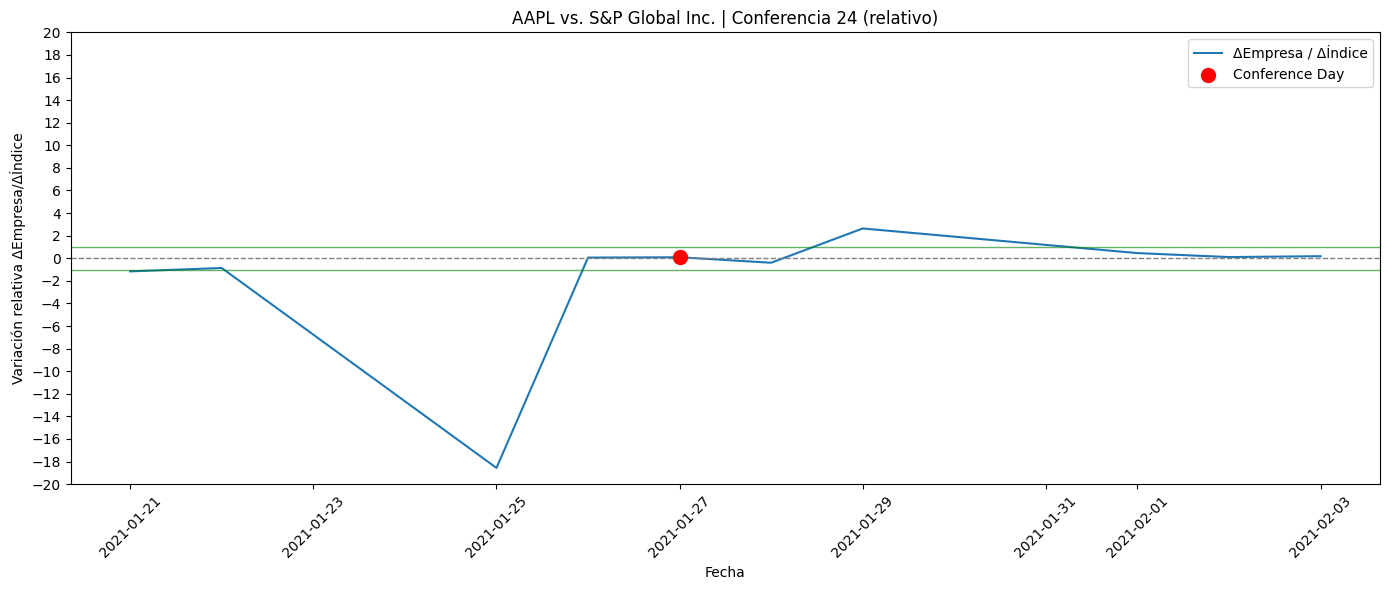

In [44]:
# Modo absoluto (original)
plot_price_with_index_in_conference_range(df_ap, labels_data, ticker='AAPL', marcador='barra', relativo=False)

# Modo relativo (ΔEmpresa / ΔÍndice)
plot_price_with_index_in_conference_range(df_ap, labels_data, ticker='AAPL', marcador='barra', relativo=True)

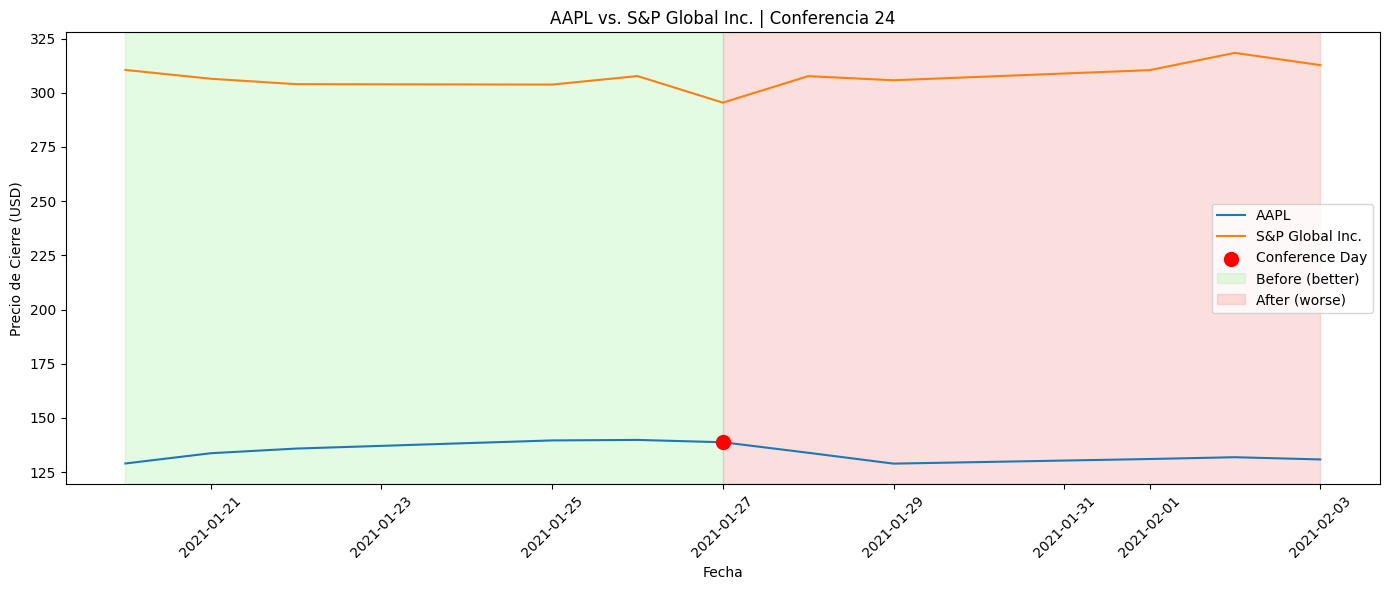

In [36]:
plot_price_with_index_in_conference_range(df_empresa=df_ap, labels_data=labels_data, ticker='AAPL', marcador='barra')

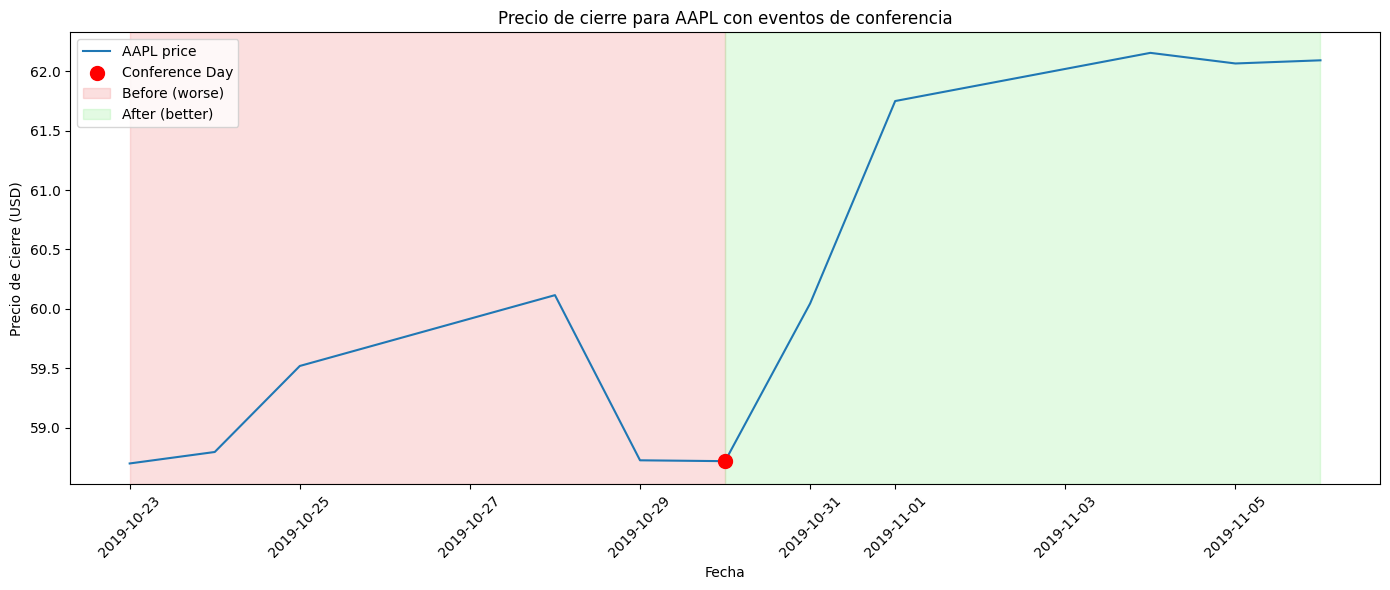

In [20]:
plot_prices_with_conferences(df_ap, 'AAPL', marcador='barra')
# plot_prices_with_conferences(df_ap, 'AAPL', marcador='barra')

In [16]:
def plot_all_conferences_for_company(df, ticker, color=True, years=None):
    """
    Dibuja el precio de cierre para una empresa a lo largo del tiempo,
    marcando las fechas de conferencia con puntos rojos y (opcionalmente)
    coloreando los intervalos antes y después según la evolución del precio medio.

    Parámetros:
    - df: DataFrame con columnas:
        'Date', 'Close', 'Ticker', 'conference_timestamp', 'conference_id',
        'label_start_date', 'label_end_date'
    - ticker: str, e.g., 'AAPL'
    - color: bool. Si True, pinta las mitades de cada intervalo según si el precio sube o baja.
    - years: list de dos enteros [start_year, end_year] para filtrar el intervalo entre
             el 1 de enero de start_year y el 1 de enero de end_year (excluido).
    """
    df_company = df[df['Ticker'] == ticker].copy()

    # Asegurar tipos datetime
    df_company['Date'] = pd.to_datetime(df_company['Date'])
    df_company['conference_timestamp'] = pd.to_datetime(df_company['conference_timestamp'])
    df_company['label_start_date'] = pd.to_datetime(df_company['label_start_date'])
    df_company['label_end_date'] = pd.to_datetime(df_company['label_end_date'])

    # Filtrar por años si se especifica
    if years:
        start_year, end_year = years
        start_date = pd.Timestamp(f'{start_year}-01-01')
        end_date = pd.Timestamp(f'{end_year}-01-01')  # exclusivo
        df_company = df_company[(df_company['Date'] >= start_date) & (df_company['Date'] < end_date)]

    if df_company.empty:
        print(f"No hay datos para {ticker} en el intervalo {years}.")
        return

    plt.figure(figsize=(14, 6))

    # Línea de evolución del precio
    sns.lineplot(data=df_company, x='Date', y='Close', label=f'{ticker} price')

    # Ejemplos para leyenda
    plt.scatter([], [], color='red', s=100, label='Conference Day')
    if color:
        plt.fill_between([], [], [], color='lightcoral', alpha=0.25, label='Peor mitad')
        plt.fill_between([], [], [], color='lightgreen', alpha=0.25, label='Mejor mitad')

    for _, row in df_company.drop_duplicates('conference_id').iterrows():
        ts = row['conference_timestamp']
        start = row['label_start_date']
        end = row['label_end_date']

        if color:
            before_mask = (df_company['Date'] >= start) & (df_company['Date'] < ts)
            after_mask = (df_company['Date'] > ts) & (df_company['Date'] <= end)

            mean_before = df_company.loc[before_mask, 'Close'].mean()
            mean_after = df_company.loc[after_mask, 'Close'].mean()

            if pd.notna(mean_before) and pd.notna(mean_after):
                if mean_before > mean_after:
                    plt.axvspan(start, ts, color='lightgreen', alpha=0.25)
                    plt.axvspan(ts, end, color='lightcoral', alpha=0.25)
                elif mean_after > mean_before:
                    plt.axvspan(start, ts, color='lightcoral', alpha=0.25)
                    plt.axvspan(ts, end, color='lightgreen', alpha=0.25)
                else:
                    plt.axvspan(start, end, color='lightgray', alpha=0.25)
            else:
                plt.axvspan(start, end, color='lightgray', alpha=0.25)

        # Punto rojo en el día de la conferencia
        close_value = df_company[df_company['Date'] == ts]['Close']
        if close_value.empty:
            closest_row = df_company.iloc[(df_company['Date'] - ts).abs().argsort().iloc[0]]
            ts = closest_row['Date']
            close_value = closest_row['Close']
        else:
            close_value = close_value.iloc[0]

        plt.scatter(ts, close_value, color='red', s=100, zorder=5)

    # Título dinámico
    title = f'{ticker} - Precio de cierre'
    if years:
        title += f' ({years[0]}–{years[1]})'

    if color:
        n_total = 0
        n_mejora = 0
        for _, row in df_company.drop_duplicates('conference_id').iterrows():
            ts = row['conference_timestamp']
            start = row['label_start_date']
            end = row['label_end_date']

            before_mask = (df_company['Date'] >= start) & (df_company['Date'] < ts)
            after_mask = (df_company['Date'] > ts) & (df_company['Date'] <= end)

            mean_before = df_company.loc[before_mask, 'Close'].mean()
            mean_after = df_company.loc[after_mask, 'Close'].mean()

            if pd.notna(mean_before) and pd.notna(mean_after):
                n_total += 1
                if mean_after > mean_before:
                    n_mejora += 1

        if n_total > 0:
            title += f' | Mejoras tras conferencias: {n_mejora}/{n_total}'

    plt.title(title)

    # Eje X
    plt.xlabel('Fecha')
    plt.ylabel('Precio de Cierre (USD)')

    if years:
        start_tick = pd.Timestamp(f'{years[0]}-01-01')
        end_tick = pd.Timestamp(f'{years[1]}-01-01')

        # Fechas de conferencias dentro del intervalo
        scatter_dates = df_company['conference_timestamp'].dropna()
        scatter_dates = scatter_dates[(scatter_dates >= start_tick) & (scatter_dates < end_tick)]
        scatter_dates = scatter_dates.dt.floor('D').unique().tolist()

        # Añadir los límites del rango
        xtick_dates = [start_tick, end_tick] + scatter_dates
        xtick_dates = sorted(set(xtick_dates))

        plt.xticks(xtick_dates, rotation=45)

    plt.legend()
    plt.tight_layout()
    plt.show()

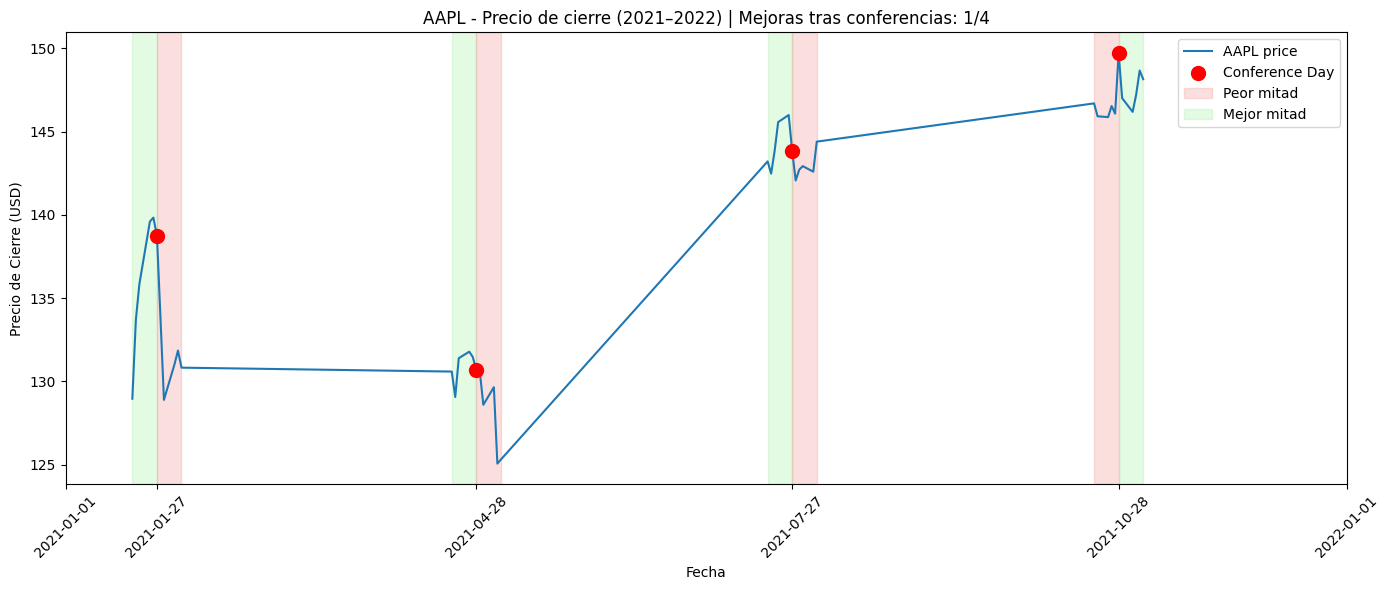

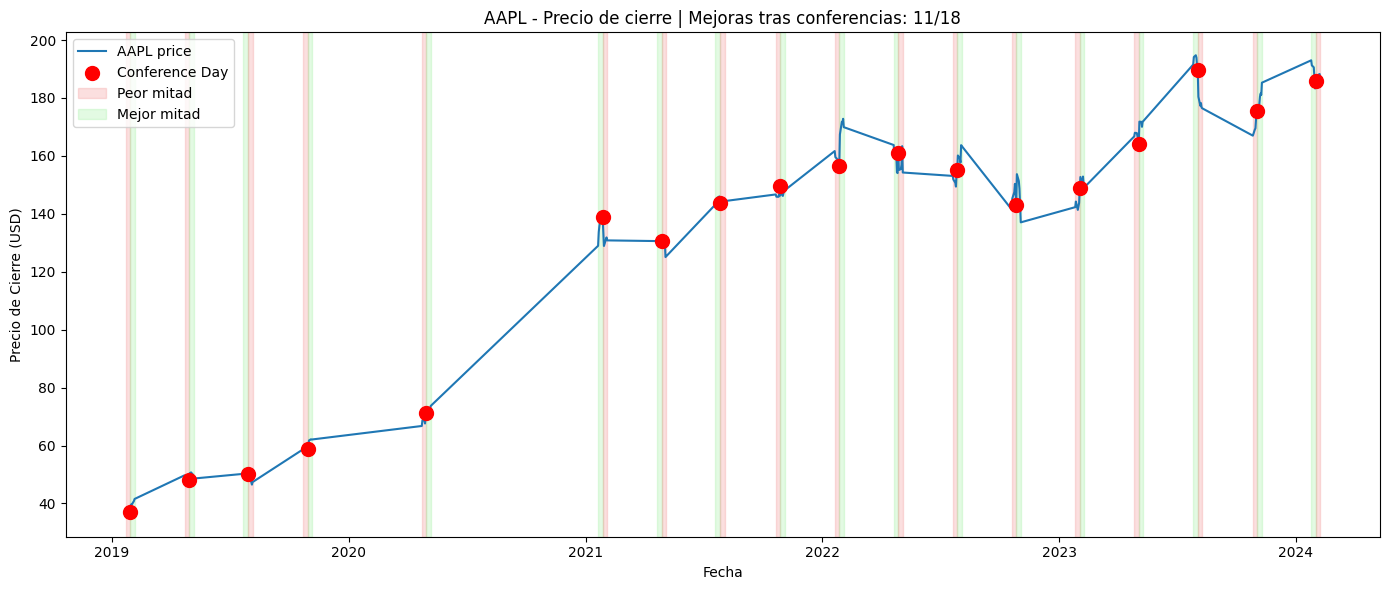

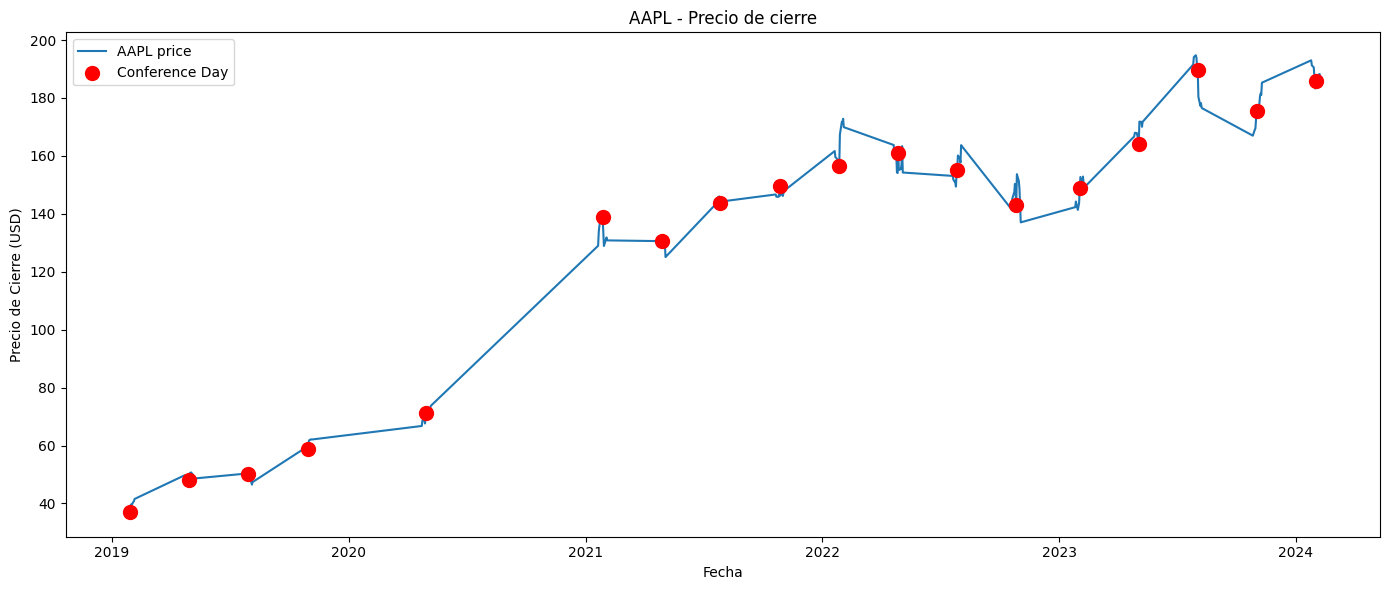

In [17]:
plot_all_conferences_for_company(df_with_conferences, 'AAPL', color=True, years=[2021, 2022])

plot_all_conferences_for_company(df_with_conferences, 'AAPL', color=True)

plot_all_conferences_for_company(df_with_conferences, 'AAPL', color=False)

In [18]:
def plot_full_price_with_conferences(labels_data, conf_data, ticker, color=True, years=None, plot_index=False):
    """
    Dibuja el precio de una empresa con toda su evolución temporal, y sobre él marca las zonas de conferencia.
    """
    # Filtrar base completa
    df_base = labels_data[labels_data['Ticker'] == ticker].copy()
    df_base['Date'] = pd.to_datetime(df_base['Date'])

    # Subconjunto de conferencias
    df_conf = conf_data[conf_data['Ticker'] == ticker].copy()
    df_conf['conference_timestamp'] = pd.to_datetime(df_conf['conference_timestamp'])
    df_conf['label_start_date'] = pd.to_datetime(df_conf['label_start_date'])
    df_conf['label_end_date'] = pd.to_datetime(df_conf['label_end_date'])

    if years:
        start_year, end_year = years
        start_date = pd.Timestamp(f'{start_year}-01-01')
        end_date = pd.Timestamp(f'{end_year}-01-01')
        df_base = df_base[(df_base['Date'] >= start_date) & (df_base['Date'] < end_date)]
        df_conf = df_conf[(df_conf['conference_timestamp'] >= start_date) & (df_conf['conference_timestamp'] < end_date)]

    if df_base.empty:
        print(f"No hay datos para {ticker} en el intervalo {years}.")
        return

    plt.figure(figsize=(14, 6))

    # Índice general (S&P Global Inc.)
    df_index = labels_data[labels_data['Entreprise'] == 'S&P Global Inc.'].copy()
    df_index['Date'] = pd.to_datetime(df_index['Date'])
    df_index = df_index[(df_index['Date'] >= df_base['Date'].min()) & (df_index['Date'] <= df_base['Date'].max())]


    # Línea completa del precio
    sns.lineplot(data=df_base, x='Date', y='Close', label=f'{ticker} price')

    if plot_index:
        # Línea del índice
        sns.lineplot(data=df_index, x='Date', y='Close', label='S&P Global Inc.', linestyle='--', color='gray')

    # Añadir leyenda base
    plt.scatter([], [], color='red', s=100, label='Conference Day')
    if color:
        plt.fill_between([], [], [], color='lightcoral', alpha=0.25, label='Peor mitad')
        plt.fill_between([], [], [], color='lightgreen', alpha=0.25, label='Mejor mitad')

    n_total = 0
    n_mejora = 0

    for _, row in df_conf.drop_duplicates('conference_id').iterrows():
        ts = row['conference_timestamp']
        start = row['label_start_date']
        end = row['label_end_date']

        # Calcular medias en el rango usando df_base
        before_mask = (df_base['Date'] >= start) & (df_base['Date'] < ts)
        after_mask = (df_base['Date'] > ts) & (df_base['Date'] <= end)

        mean_before = df_base.loc[before_mask, 'Close'].mean()
        mean_after = df_base.loc[after_mask, 'Close'].mean()

        if color:
            if pd.notna(mean_before) and pd.notna(mean_after):
                if mean_after > mean_before:
                    plt.axvspan(start, ts, color='lightcoral', alpha=0.25)
                    plt.axvspan(ts, end, color='lightgreen', alpha=0.25)
                    n_mejora += 1
                elif mean_before > mean_after:
                    plt.axvspan(start, ts, color='lightgreen', alpha=0.25)
                    plt.axvspan(ts, end, color='lightcoral', alpha=0.25)
                else:
                    plt.axvspan(start, end, color='lightgray', alpha=0.25)
                n_total += 1

        # Añadir punto rojo
        closest = df_base.iloc[(df_base['Date'] - ts).abs().argsort().iloc[0]]
        plt.scatter(closest['Date'], closest['Close'], color='red', s=100, zorder=5)

    # Título final
    title = f'{ticker} - Precio de cierre'
    if years:
        title += f' ({years[0]}–{years[1]})'
    if color and n_total > 0:
        title += f' | Mejoras tras conferencias: {n_mejora}/{n_total}'
    plt.title(title)

    # Eje X
    plt.xlabel('Fecha')
    plt.ylabel('Precio de Cierre (USD)')

    if years:
        start_tick = pd.Timestamp(f'{years[0]}-01-01')
        end_tick = pd.Timestamp(f'{years[1]}-01-01')
        xtick_dates = [start_tick, end_tick] + df_conf['conference_timestamp'].dt.floor('D').tolist()
        xtick_dates = sorted(set(xtick_dates))
        plt.xticks(xtick_dates, rotation=45)
        plt.axvline(start_tick, color='gray', linestyle=':', linewidth=0.8)
        plt.axvline(end_tick, color='gray', linestyle=':', linewidth=0.8)

    plt.legend()
    plt.tight_layout()
    plt.show()


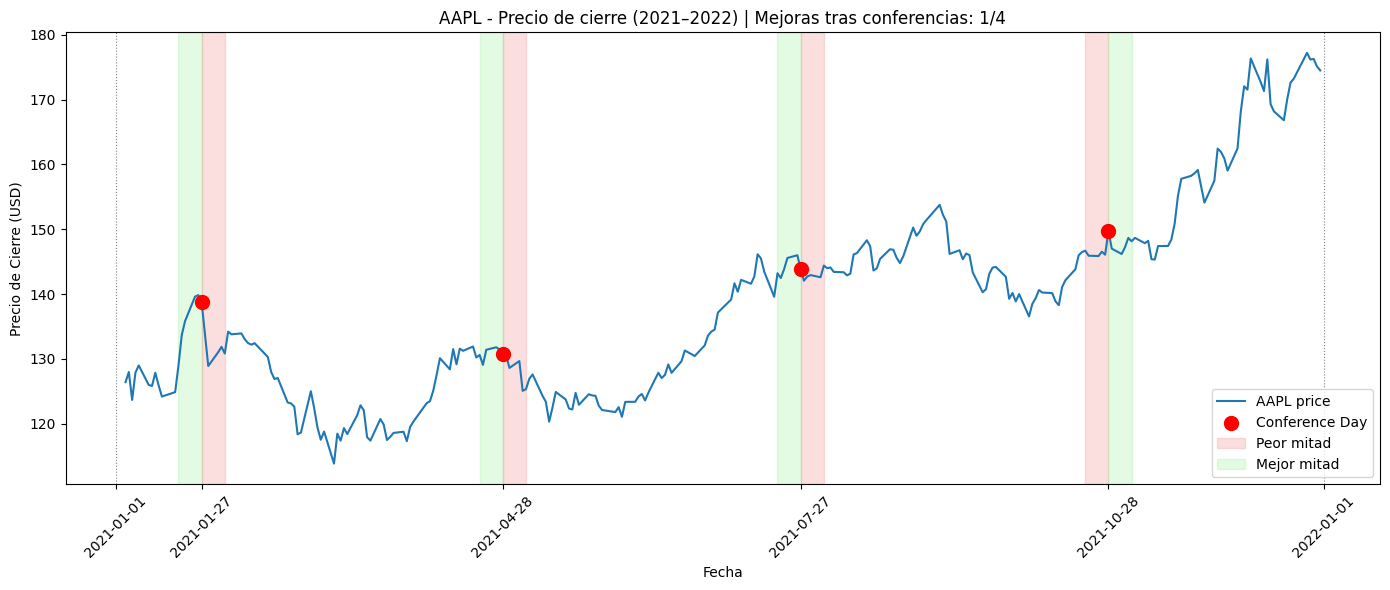

In [21]:
plot_full_price_with_conferences(labels_data, def_df, ticker='AAPL', color=True, years=[2021, 2022], plot_index=False)